In [1]:
%run startup.py

In [2]:
plt.style.use('bmh')

### Read the data

(500, 5)


,open,high,low,close,volume
dt1,,,,,
2022-10-16 14:00:00,"1,284.65","1,285.60","1,280.19","1,283.12","8,268.21"
2022-10-16 15:00:00,"1,283.13","1,287.79","1,282.97","1,286.35","8,622.73"
2022-10-16 16:00:00,"1,286.36","1,287.71","1,285.48","1,286.44","2,257.71"


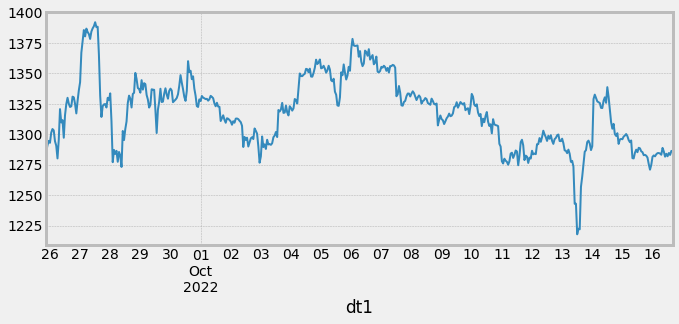

In [3]:
# get the data
url = 'https://cexa.oceanprotocol.io/ohlc?exchange=binance&pair=ETH/USDT&period=1h'
df = pd.read_json(url)
df.columns = ['dt1','open','high','low','close','volume']
# convert to UTC+0
a = [dt.fromtimestamp(x/1000) - relativedelta(hours=6) for x in df.dt1]
df['dt1'] = a
df.to_csv('data/ETH_USDT_free.csv', index = False)
df.set_index('dt1', inplace = True)

print(df.shape)
display(df[-3:])

_ = df['close'].plot(figsize = (10,4))

### Make predictions

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


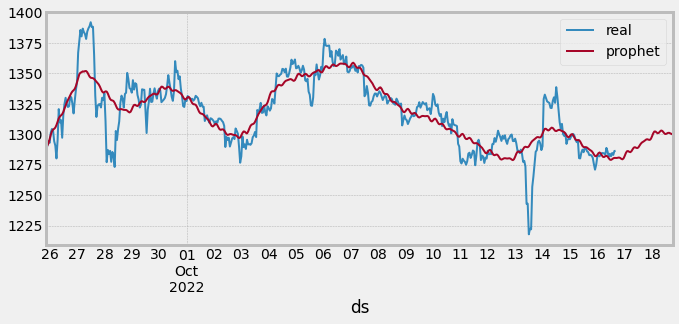

In [4]:
from prophet import Prophet

# 1) prepare dataframe
x = df.close
x = x.reset_index()
x.columns = ['ds','y']

# 2) build model
m = Prophet(weekly_seasonality=True, daily_seasonality=True, )
m.fit(x)

# # 3) predict
t1 = 50
df1 = m.make_future_dataframe(periods=t1, freq='h')
df_out = m.predict(df1)

# 4) plotting
_ = x.set_index('ds').plot(figsize = (10,4))
_ = df_out.set_index('ds')['yhat'].plot()
_ = _.legend(['real','prophet'])

In [5]:
# output for Ocean
day = 17
x_out = df_out.set_index('ds').loc[f'2022-10-{day}':][['yhat']][1:25].T
x_out.to_csv('data/output.csv', index = False, header = False, float_format = '%.3f')

### Exploration

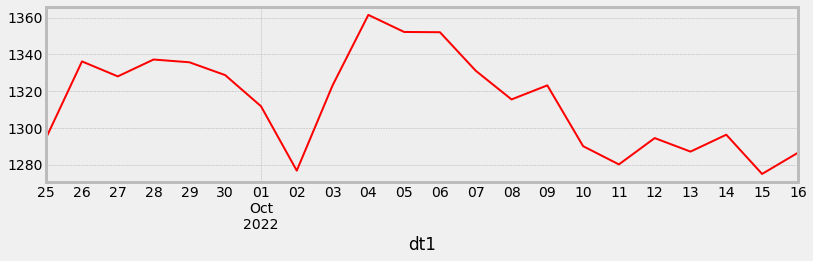

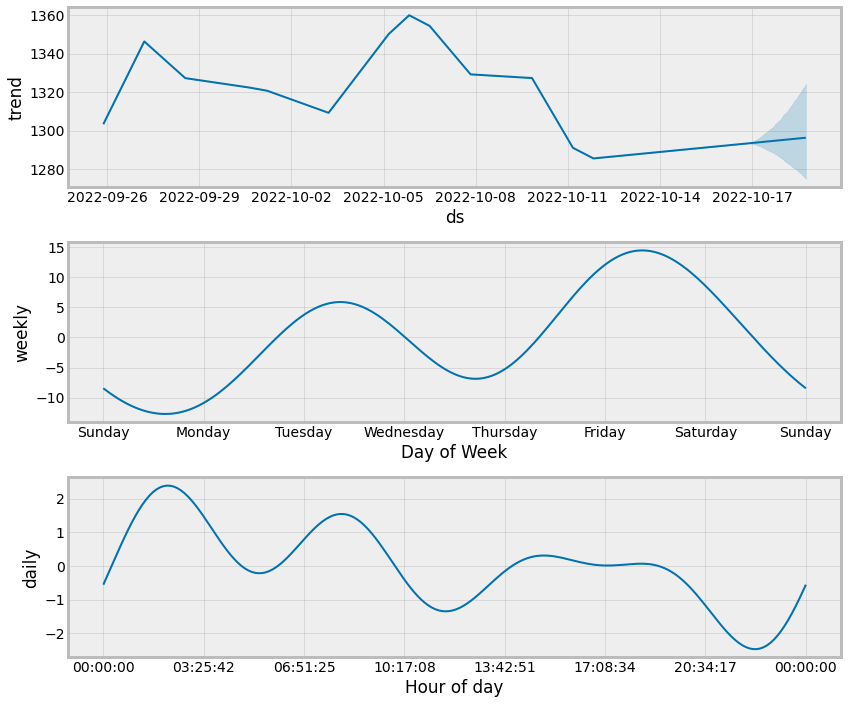

In [7]:
_ = df.resample('D').last()['close'].plot(figsize = (12,3), color = 'red')
plt.show()
m.plot_components(df_out, figsize = (12,10))
plt.show()